# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Interactive plots
%matplotlib notebook

# Dependencies and Setup
import requests
import random
import json
import os
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from citipy import citipy
from pprint import pprint

# Set by selecting a datasource import type (CSV or API)
source = 'api'
#source = 'csv'

# Remember to update the config file with your API key
from api_keys import weather_api_key

# Set variable for current date using datetime library
today = datetime.date.today()

# Set base url for API import
url = "http://api.openweathermap.org/data/2.5/weather?"

# API import unit parameter
# Temperature in Fahrenheit use units=imperial
# Temperature in Celsius use units=metric
units = "imperial"

# Build initial query URL for API import
query_url = url + "appid=" + weather_api_key + "&units=" + units + "&q="

# Set todays date as active and formatted as mm/dd/yy for API import
date = today.strftime('%m/%d/%y')
datef = today.strftime('%m%d%y')

# Set a specific date as active parameter for CSV import
#date = '09/12/20'
#datef = '091220'

# Print active date
print(date)

09/17/20


## Import Cities List

In [2]:
def importcityfile(date):
    # Read CSV containing cities weather data
    file = os.path.join('data', f'wx_cities_{date}.csv')
    df_wx = pd.read_csv(file)
    df_wx = df_wx.drop(columns=['Unnamed: 0'])
    print(f"There are {len(df_wx)} records retrieved from csvfile.")
    return df_wx

## Generate Cities List

In [3]:
def getrandcity():
    # Initialize cities to largest city near equator is Kinshasa at -4.44, 15.91
    cities = ['Kinshasa']

    while len(cities) < 750:
        flag = True
        x = citipy.nearest_city(random.uniform(-90, 90), random.uniform(-180, 180))
        for i in range(len(cities)):
            if cities[i] == x.city_name.title():
                flag = False
                break
        if flag == True:
            cities.append(x.city_name.title())
            
    cities_alpha = sorted(cities)
    #print(cities_alpha)
    print('Random cities generated')
    return cities_alpha

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
def getdata_api(cities_alpha, query_url):
# Iterative loop for API weather calls if associated city is found
    cities_id = []
    cities_name = []
    countries = []
    lat = []
    lon = []

    wx_date = []
    wx_clouds = []
    wx_humidity = []
    wx_temp_max = []
    wx_wind_speed = []

    print("Beginning Data Retrieval")
    print('-'*40)

    for i in cities_alpha:
        flag = True
        weather_response = requests.get(query_url + i)
        wx_json = weather_response.json()
        try:
            cities_id.append(wx_json['id'])
            cities_name.append(wx_json['name'])
            countries.append(wx_json['sys']['country'])
            lat.append(wx_json['coord']['lat'])
            lon.append(wx_json['coord']['lon'])
            wx_date.append(wx_json['dt'])
            print(i)
        except:
            print(f"city " + i + " not found. skipping...")
            flag = False
        
        if flag == True:
            try:            
                wx_clouds.append(wx_json['clouds']['all'])      
            except:
                print("...clouds missing. skipping...")
                wx_clouds.append(None)
            
            try:
                wx_humidity.append(wx_json['main']['humidity'])
            except:
                print("...humidity missing. skipping...")
                wx_humidity.append(None)
      
            try:
                wx_temp_max.append(wx_json['main']['temp_max'])
            except:
                print("...temperature missing. skipping...")
                wx_temp_max.append(None)

            try:
                wx_wind_speed.append(wx_json['wind']['speed'] * 2.23693629)  
            except:
                print("...wind speed missing. skipping...")      
                wx_wind_speed.append(None)   
            
    print('-'*40)
    print("Data Retrieval Complete")
    print('-'*40)    
    
    # Create a dictionary with the naming field convention to store data lists
    wx_dict = {
        "City ID": cities_id,
        "City": cities_name,
        "Country": countries,
        "Lat": lat,
        "Lon": lon,
        "Date (UTC)": wx_date,
        "Clouds (%)": wx_clouds,
        "Humidity (%)": wx_humidity,
        "Max Temp (F)": wx_temp_max,
        "Wind Speed (mph)": wx_wind_speed
    }

    # Create dataframe of the dictionary
    df_wx = pd.DataFrame(wx_dict)

    return df_wx

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
def exportdata_api(df_wx, date):    
    # Set the file path to export city data
    csvFile = os.path.join("data",f"wx_cities_{date}.csv")

    # Export datframe to csv file
    df_wx.to_csv(csvFile)

    return 'API export to CSV completed'

### Call Defined Functions
* Based on data source, either importing data from CSV file or pulling from API
* CSV data - date parameter is used
* API data - date, key and url parameter is used

In [6]:
if source == 'csv':
    df_wx = importcityfile(datef)
    print('CSV import completed')
elif source == 'api':
    randcity = getrandcity()
    df_wx = getdata_api(randcity, query_url)
    print('API data retrieved')
    export = exportdata_api(df_wx, datef) 
    print(export)
else:
    print('Please select a valid import source (CSV or API)')

Random cities generated
Beginning Data Retrieval
----------------------------------------
Abancay
Abrau-Dyurso
Abu Samrah
Acarau
Ahipara
Airai
Aklavik
Aksu
Albany
Alcaniz
Alekseyevskaya
Alice Springs
Aljezur
Alofi
Alta Floresta
Altamira
Altay
Alzamay
Amapa
Amboasary
Ambon
city Amderma not found. skipping...
Anadyr
Ancud
Andrews
Angoche
Ansalta
Antofagasta
Arcachon
Areia Branca
Arman
Aromashevo
Arona
Arraial Do Cabo
Asau
Asyut
Atambua
Atar
city Attawapiskat not found. skipping...
Atuona
Avarua
Avera
Awbari
Axim
Aykhal
Baghdad
Baie-Comeau
Bainbridge
Bairiki
Bam
Bambous Virieux
Banda Aceh
Bandar
Bandar-E Lengeh
Bandarbeyla
Bani
city Barentsburg not found. skipping...
Barrow
Basarabi
Basirpur
Bathsheba
Bati
Batsfjord
Bayaguana
Bayangol
Baykit
Beaverlodge
Bedong
Beeville
Belaya Gora
Belmonte
Beloha
Beloit
city Belushya Guba not found. skipping...
Benghazi
Bengkulu
Benguela
Benicarlo
Bereda
Beringovskiy
Berlevag
Bermejo
Bethel
Beyneu
Biak
Bilibino
Bilma
Biloela
Birigui
Birin
Biu
Black River


Verkhoyansk
Vestmannaeyjar
Victoria
Victoria Falls
Vidim
Vila
Vila Franca Do Campo
Vila Velha
Voh
Volzhskiy
Vostok
Voyvozh
Vrangel
Vydrino
Waipawa
Wanning
Wattegama
Wellington
Wenzhou
West Bay
West Wendover
Westport
Weyburn
Whakatane
Whitehorse
Wonthaggi
Xichang
Yabelo
Yamada
Yanam
city Yanchukan not found. skipping...
Yangambi
Yantzaza
Yellowknife
Yeppoon
Yerbogachen
Yichang
Yidu
Yima
Ystad
Yuancheng
Yulara
Yumen
Zapolyarnyy
Zhigansk
Zlobin
Zyryanka
----------------------------------------
Data Retrieval Complete
----------------------------------------
API data retrieved
API export to CSV completed


In [7]:
# Display the dataframe retrieved after importing
df_wx

,City ID,City,Country,Lat,Lon,Date (UTC),Clouds (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,3948642,Abancay,PE,-13.63,-72.88,1600360690,62,37,70.18,17.470472
1,584365,Abrau-Dyurso,RU,44.69,37.59,1600360690,0,52,75.00,9.999105
2,172515,Abu Samrah,SY,35.30,37.18,1600360690,0,38,78.87,23.107552
3,3408368,Acaraú,BR,-2.89,-40.12,1600360690,0,52,87.08,50.331067
4,2194098,Ahipara,NZ,-35.17,173.17,1600360690,98,78,57.43,27.268253
...,...,...,...,...,...,...,...,...,...,...
690,1528998,Yumen,CN,40.28,97.20,1600360824,0,30,57.38,21.273264
691,464790,Zapolyarnyy,RU,69.42,30.81,1600360824,62,65,44.60,25.523443
692,2012530,Zhigansk,RU,66.77,123.37,1600360825,0,79,39.33,4.294918
693,3191648,Zlobin,HR,45.29,14.65,1600360825,20,47,80.60,46.528275


In [8]:
# Generate an overall statistical summaries of all the fields retrieved

f_count = []
f_mean = []
f_std = []
f_min = []
f_q1 = []
f_q2 = []
f_q3 = []
f_max = []

for i in range(3,10):
    df_wxs = df_wx.iloc[:,i]
    f_count.append(len(df_wxs))
    quantiles = df_wxs.quantile([.25,.5,.75], interpolation="midpoint")
    f_q1.append(quantiles.iloc[0])
    f_q2.append(quantiles.iloc[1]) 
    f_q3.append(quantiles.iloc[2])
    df_wxs_agg = df_wxs.agg([np.mean, np.std, np.min, np.max])
    f_mean.append(df_wxs_agg[0])
    f_std.append(df_wxs_agg[1])
    f_min.append(df_wxs_agg[2])
    f_max.append(df_wxs_agg[3])


stats = {
        "count": f_count, 
        "mean": f_mean,
        "std": f_std,
        "min": f_min,
        "25%": f_q1,
        "50%": f_q2,
        "75%": f_q3,
        "max": f_max
}

df_stats = pd.DataFrame(stats)
df_stats = df_stats.T
df_stats.columns = ['Lat', 'Lon', 'Date (UTC)', 'Clouds (%)', 'Humidity (%)', 'Max Temp (F)', 'Wind Speed (mph)']
df_stats

,Lat,Lon,Date (UTC),Clouds (%),Humidity (%),Max Temp (F),Wind Speed (mph)
count,695.000000,695.000000,6.950000e+02,695.000000,695.000000,695.000000,695.000000
mean,19.663381,20.324245,1.600361e+09,48.043165,67.726619,68.527928,18.774043
std,32.767315,89.409110,6.461003e+01,36.805093,22.540519,16.607251,13.704988
min,-54.800000,-179.170000,1.600360e+09,0.000000,3.000000,20.930000,0.290802
25%,-6.680000,-58.695000,1.600361e+09,9.000000,55.500000,55.285000,8.724052
50%,23.270000,23.350000,1.600361e+09,43.000000,73.000000,71.600000,15.501968
75%,47.660000,100.345000,1.600361e+09,80.000000,85.000000,80.600000,25.523443
max,78.220000,179.320000,1.600361e+09,100.000000,100.000000,109.350000,104.039907


In [9]:
# Generate a date (UTC) average summary by grouping the date column
df_wxd = df_wx.groupby(["Date (UTC)"])

city_num = df_wxd["City ID"].count()
cloud_avg = df_wxd["Clouds (%)"].mean()
humid_avg = df_wxd["Humidity (%)"].mean()
temp_avg = df_wxd["Max Temp (F)"].mean()
wind_avg = df_wxd["Wind Speed (mph)"].mean()

daily_avg = {
    "Total Cities": city_num,
    "Clouds (%)": round([cloud_avg][0],2),
    "Humidity (%)": round([humid_avg][0],2),
    "Max Temp (F)": round([temp_avg][0],2),
    "Wind Speed (mph)": round([wind_avg][0],2)
}

df_daily_avg = pd.DataFrame(daily_avg)

print("There are " + str(len(df_daily_avg)) + " UTC dates in the dataset.")

# Added postcomplete to sort for regimen with median tumor volume for reporting
df_daily_avg = df_daily_avg.sort_values(by=["Date (UTC)"])
df_daily_avg

There are 187 UTC dates in the dataset.


,Total Cities,Clouds (%),Humidity (%),Max Temp (F),Wind Speed (mph)
Date (UTC),,,,,
1600360421,1,90.00,100.00,60.01,7.52
1600360465,1,87.00,81.00,64.85,14.16
1600360471,1,0.00,7.00,71.60,15.50
1600360472,1,1.00,62.00,55.40,13.51
1600360483,1,40.00,67.00,59.00,23.02
...,...,...,...,...,...
1600360821,5,71.40,74.00,58.49,22.19
1600360822,3,60.00,82.33,77.33,11.95
1600360823,6,20.33,79.00,62.25,11.12


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
# Generate a statistical summary of all cities humidity value 
print("There are " + str(len(df_wx)) + " total records in the dataset.")

df_wxh = df_wx["Humidity (%)"]
df_wxh = df_wxh.agg([np.min, np.max, np.mean, np.median, np.var, np.std])
df_wxh

There are 695 total records in the dataset.


amin        3.000000
amax      100.000000
mean       67.726619
median     73.000000
var       508.075011
std        22.540519
Name: Humidity (%), dtype: float64

In [11]:
#  Get the indices of cities that have humidity over 100%.
hindex = []
if df_wxh['amax'] > 100:
    for i in range(len(df_wx)):
        if df_wx['Humidity (%)'][i] > 100: 
            hindex.append(i)
    print(f' The indices {hindex} have humidity over 100%')
else:
    print('There are no cities with humidity over 100%')

There are no cities with humidity over 100%


In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
df_wx_clean = df_wx.drop(hindex)
df_wx_clean

,City ID,City,Country,Lat,Lon,Date (UTC),Clouds (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,3948642,Abancay,PE,-13.63,-72.88,1600360690,62,37,70.18,17.470472
1,584365,Abrau-Dyurso,RU,44.69,37.59,1600360690,0,52,75.00,9.999105
2,172515,Abu Samrah,SY,35.30,37.18,1600360690,0,38,78.87,23.107552
3,3408368,Acaraú,BR,-2.89,-40.12,1600360690,0,52,87.08,50.331067
4,2194098,Ahipara,NZ,-35.17,173.17,1600360690,98,78,57.43,27.268253
...,...,...,...,...,...,...,...,...,...,...
690,1528998,Yumen,CN,40.28,97.20,1600360824,0,30,57.38,21.273264
691,464790,Zapolyarnyy,RU,69.42,30.81,1600360824,62,65,44.60,25.523443
692,2012530,Zhigansk,RU,66.77,123.37,1600360825,0,79,39.33,4.294918
693,3191648,Zlobin,HR,45.29,14.65,1600360825,20,47,80.60,46.528275


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<IPython.core.display.Javascript object>


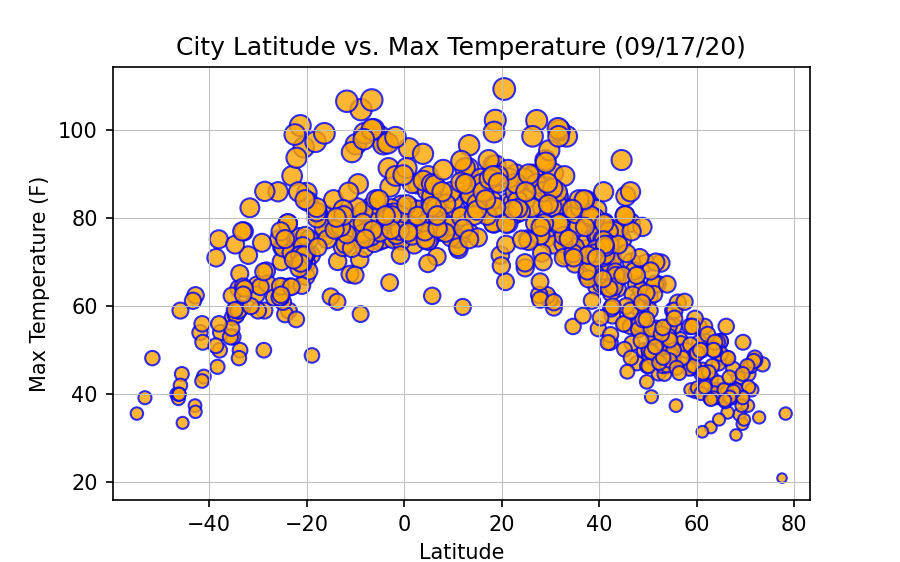

In [14]:
# Generate a scatter plot of latitude versus Temperature for the clean city dataset

# Set the size of the plot (width, height) 
plt.figure(figsize=(6,3.75))
plt.tight_layout()
plt.grid(color='#C0C0C0', linestyle='-', linewidth=0.5)

# Set title/labels
plt.title(f'City Latitude vs. Max Temperature ({date})')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')

# Create a scatter plot
plt.scatter(df_wx_clean["Lat"], df_wx_clean["Max Temp (F)"], marker="o", 
            facecolors="orange", edgecolors="blue", s=np.array(df_wx_clean["Max Temp (F)"]), alpha=0.8)

# Set x and y limits
plt.ylim(min(df_wx_clean["Max Temp (F)"])-5, max(df_wx_clean["Max Temp (F)"])+5)
plt.xlim(min(df_wx_clean["Lat"])-5, max(df_wx_clean["Lat"])+5)

# Save the chart
plt.savefig(os.path.join(f'images/{datef}',"lat_temperature_" + datef + ".png"))

# Show the chart
plt.show()

## Latitude vs. Humidity Plot

<IPython.core.display.Javascript object>


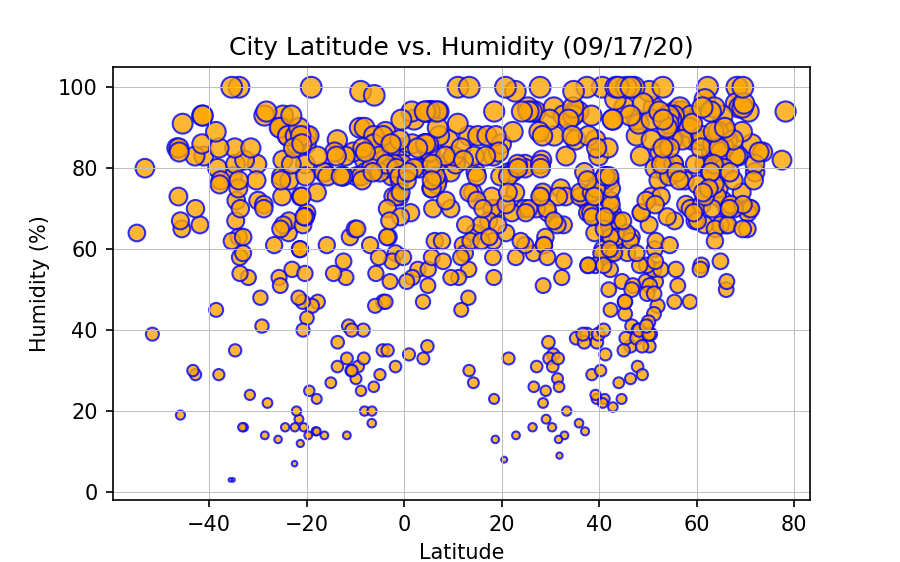

In [15]:
# Generate a scatter plot of latitude versus Humidity for the clean city dataset

# Set the size of the plot (width, height) 
plt.figure(figsize=(6,3.75))
plt.tight_layout()
plt.grid(color='#C0C0C0', linestyle='-', linewidth=0.5)

# Set title/labels
plt.title(f'City Latitude vs. Humidity ({date})')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')

# Create a scatter plot
plt.scatter(df_wx_clean["Lat"], df_wx_clean["Humidity (%)"], marker="o", 
            facecolors="orange", edgecolors="blue", s=np.array(df_wx_clean["Humidity (%)"]), alpha=0.8)

# Set x and y limits
plt.ylim(min(df_wx_clean["Humidity (%)"])-5, max(df_wx_clean["Humidity (%)"])+5)
plt.xlim(min(df_wx_clean["Lat"])-5, max(df_wx_clean["Lat"])+5)

# Save the chart
plt.savefig(os.path.join(f'images/{datef}',"lat_humidity_" + datef + ".png"))

# Show the chart
plt.show()

## Latitude vs. Cloudiness Plot

<IPython.core.display.Javascript object>


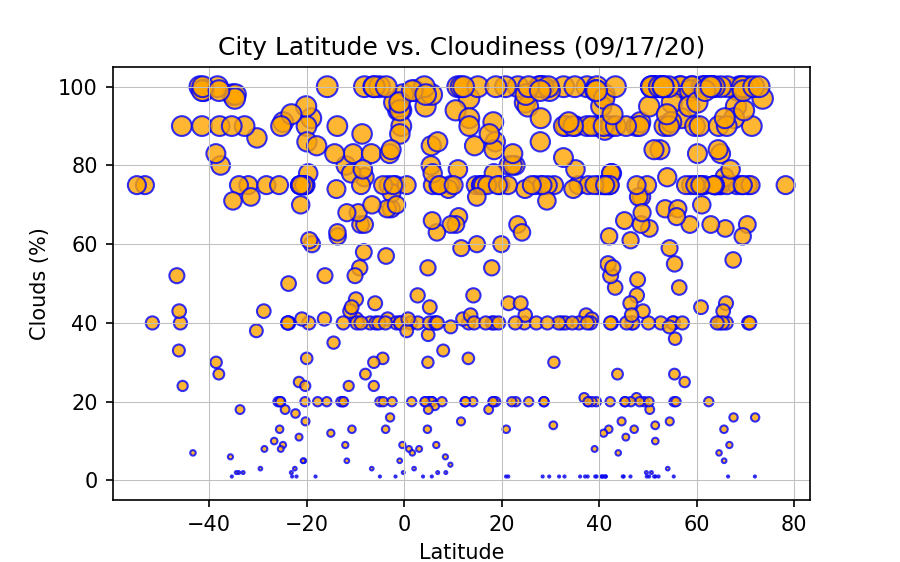

In [16]:
# Generate a scatter plot of latitude versus Cloudiness for the clean city dataset

# Set the size of the plot (width, height) 
plt.figure(figsize=(6,3.75))
plt.tight_layout()
plt.grid(color='#C0C0C0', linestyle='-', linewidth=0.5)

# Set title/labels
plt.title(f'City Latitude vs. Cloudiness ({date})')
plt.ylabel('Clouds (%)')
plt.xlabel('Latitude')

# Create a scatter plot
plt.scatter(df_wx_clean["Lat"], df_wx_clean["Clouds (%)"], marker="o", 
            facecolors="orange", edgecolors="blue", s=np.array(df_wx_clean["Clouds (%)"]), alpha=0.8)

# Set x and y limits
plt.ylim(min(df_wx_clean["Clouds (%)"])-5, max(df_wx_clean["Clouds (%)"])+5)
plt.xlim(min(df_wx_clean["Lat"])-5, max(df_wx_clean["Lat"])+5)

# Save the chart
plt.savefig(os.path.join(f'images/{datef}',"lat_clouds_" + datef + ".png"))

# Show the chart
plt.show()

## Latitude vs. Wind Speed Plot

<IPython.core.display.Javascript object>


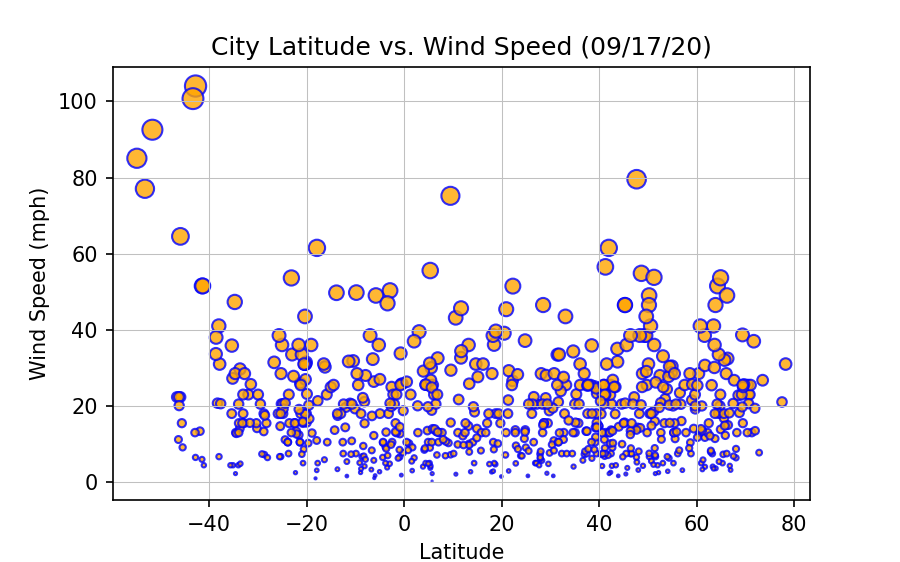

In [17]:
# Generate a scatter plot of latitude versus Wind Speed for the clean city dataset

# Set the size of the plot (width, height) 
plt.figure(figsize=(6,3.75))
plt.tight_layout()
plt.grid(color='#C0C0C0', linestyle='-', linewidth=0.5)

# Set title/labels
plt.title(f'City Latitude vs. Wind Speed ({date})')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')

# Create a scatter plot
plt.scatter(df_wx_clean["Lat"], df_wx_clean["Wind Speed (mph)"], marker="o", 
            facecolors="orange", edgecolors="blue", s=np.array(df_wx_clean["Wind Speed (mph)"]), alpha=0.8)

# Set x and y limits
plt.ylim(min(df_wx_clean["Wind Speed (mph)"])-5, max(df_wx_clean["Wind Speed (mph)"])+5)
plt.xlim(min(df_wx_clean["Lat"])-5, max(df_wx_clean["Lat"])+5)

# Save the chart
plt.savefig(os.path.join(f'images/{datef}',"lat_wind_" + datef + ".png"))

# Show the chart
plt.show()

## Linear Regression

In [18]:
# Generate separate dataframes for city data in northern hemisphere
df_wx_n = df_wx_clean[(df_wx_clean['Lat'] >= 0)].sort_values(by="Lat")
df_wx_n

,City ID,City,Country,Lat,Lon,Date (UTC),Clouds (%),Humidity (%),Max Temp (F),Wind Speed (mph)
293,212730,Kisangani,CD,0.52,25.20,1600360746,75,52,91.40,10.513601
608,1337610,Thinadhoo,MV,0.53,72.93,1600360809,38,77,83.08,26.373479
679,203717,Yangambi,CD,0.81,24.43,1600360822,41,79,76.78,8.410880
18,3407762,Amapá,BR,1.00,-52.00,1600360693,8,34,95.86,10.155691
46,7601762,Bairiki Village,KI,1.33,172.98,1600360698,40,69,82.40,23.018074
...,...,...,...,...,...,...,...,...,...,...
284,2022572,Khatanga,RU,71.97,102.50,1600360744,16,79,47.71,13.511095
633,3418910,Upernavik,GL,72.79,-56.15,1600360814,100,84,34.72,7.762169
170,1507390,Dikson,RU,73.51,80.55,1600360722,97,84,46.78,26.776127
506,3831208,Qaanaaq,GL,77.48,-69.36,1600360787,0,82,20.93,21.071940


In [19]:
# Generate separate dataframes for city data in southern hemisphere
df_wx_s = df_wx_clean[(df_wx_clean['Lat'] < 0)].sort_values(by="Lat")
df_wx_s

,City ID,City,Country,Lat,Lon,Date (UTC),Clouds (%),Humidity (%),Max Temp (F),Wind Speed (mph)
636,3833367,Ushuaia,AR,-54.80,-68.30,1600360765,75,64,35.60,85.070687
503,3874787,Punta Arenas,CL,-53.15,-70.92,1600360786,75,80,39.20,77.062455
523,3838859,Río Gallegos,AR,-51.62,-69.22,1600360637,40,39,48.20,92.564424
88,2206939,Bluff,NZ,-46.60,168.33,1600360707,52,85,39.99,22.369363
265,2208248,Kaitangata,NZ,-46.28,169.85,1600360740,0,73,39.00,11.207051
...,...,...,...,...,...,...,...,...,...,...
232,1282256,Hithadhoo,MV,-0.60,73.08,1600360734,94,78,82.98,25.814245
339,1637510,Loa Janan,ID,-0.58,117.09,1600360679,90,92,74.88,1.856657
295,55671,Kismayo,SO,-0.36,42.55,1600360746,9,81,78.08,25.858984
90,218680,Boende,CD,-0.22,20.87,1600360707,98,85,77.52,7.762169


In [20]:
# Set latitude as x-value coordinates
x_val_n = df_wx_n["Lat"]
x_val_s = df_wx_s["Lat"]

# Initialize correlation lists for both sides of the hemispehere
corr_n = []
corr_s = []

# Calculate the correlation coefficient (r) and p-value 
# for latitude versus max temp, humidity, cloudiness, and wind speed for both sides of the hemisphere
for i in range(6,10):
    corr_n.append(st.pearsonr(x_val_n, df_wx_n.iloc[:,i]))
    corr_s.append(st.pearsonr(x_val_s, df_wx_s.iloc[:,i]))

# Create stats dictionary for the hemishphere correlation lists created above
stats = {
    "Northern": corr_n,
    "Southern": corr_s
}

# add stats dictionary to dataframe, rename index and display
df_corr = pd.DataFrame(stats)
df_corr.index = ['Clouds (%)', 'Humidity (%)', 'Max Temp (F)', 'Wind Speed (mph)']
df_corr

,Northern,Southern
Clouds (%),"(0.12322127931624509, 0.0073583911943629525)","(0.1193659087723257, 0.0752625646030114)"
Humidity (%),"(0.0859683609340659, 0.06201132919811222)","(0.006059809222444441, 0.9282995176403426)"
Max Temp (F),"(-0.8217981268141543, 6.798217516840001e-117)","(0.7282070906320801, 4.008074953703386e-38)"
Wind Speed (mph),"(0.07943347877150418, 0.08472845673318571)","(-0.3098164528026397, 2.3919817067817907e-06)"


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient (r) is -0.82
The p-value is 6.798217516840001e-117


<IPython.core.display.Javascript object>


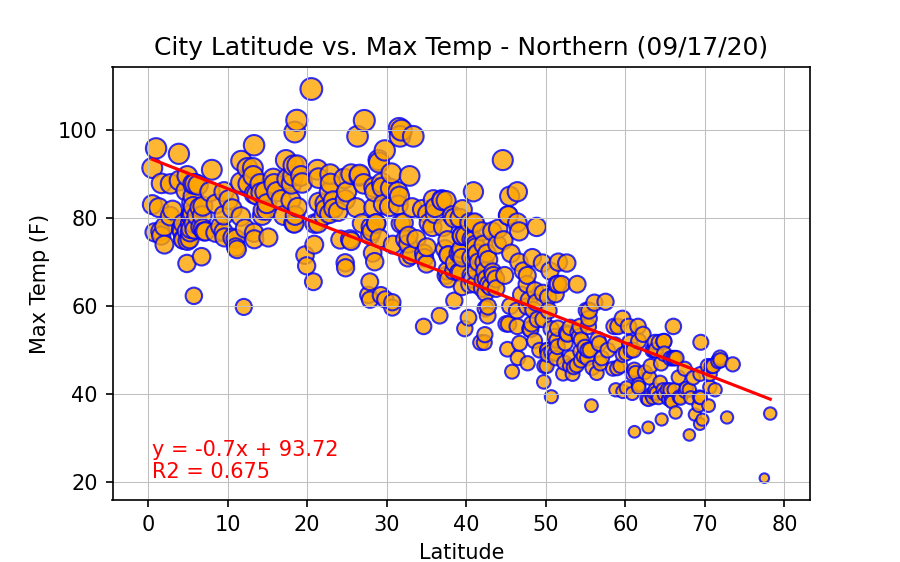

The line of best fit: y = -0.7x + 93.72
The r-squared is: 0.6753521612352527


In [21]:
# Print correlation coefficient (r) and p-value
print("The correlation coefficient (r) is " + 
      str(round((df_corr["Northern"]["Max Temp (F)"][0]),2)))                                          
print("The p-value is " + str(df_corr["Northern"]["Max Temp (F)"][1]))

# Set northen max temp as x-value coordinates
y_val = df_wx_n["Max Temp (F)"]

# Set the size of the plot (width, height) 
plt.figure(figsize=(6,3.75))
plt.tight_layout()
plt.grid(color='#C0C0C0', linestyle='-', linewidth=0.5)

# Set title/labels
plt.title(f'City Latitude vs. Max Temp - Northern ({date})')
plt.ylabel('Max Temp (F)')
plt.xlabel('Latitude')

# Create a scatter plot
plt.scatter(x_val_n, y_val, marker="o", 
            facecolors="orange", edgecolors="blue", s=np.array(y_val), alpha=0.8)

# Set x and y limits
plt.ylim(min(y_val)-5, max(y_val)+5)
plt.xlim(min(x_val_n)-5, max(x_val_n)+5)

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = st.linregress(x_val_n, y_val)

# Calculate the predictions for each value of x (# Rooms)
regression_values = x_val_n * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the regression line
plt.plot(x_val_n, regression_values, "red")

# Add the linear equation to the plot
plt.annotate(line_eq, (min(x_val_n),min(y_val)+5), fontsize=10, color="red")
plt.annotate(f"R2 = {round(rvalue**2,3)}", (min(x_val_n),min(y_val)), fontsize=10, color="red")

print(f"The line of best fit: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

# Save the chart
plt.savefig(os.path.join(f'images/{datef}',"N_lat_temperature_" + datef + ".png"))

# Show the chart
plt.show()



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient (r) is 0.73
The p-value is 4.008074953703386e-38


<IPython.core.display.Javascript object>


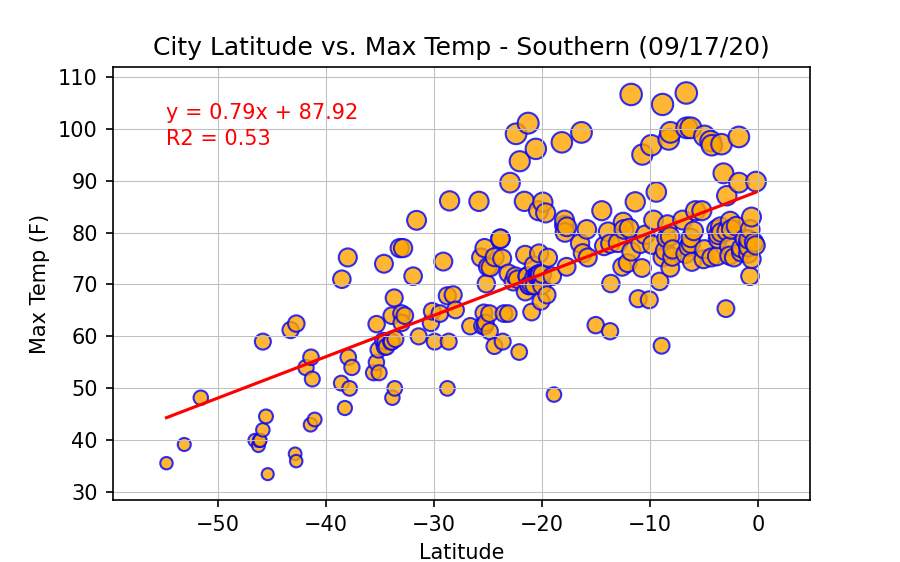

The line of best fit: y = 0.79x + 87.92
The r-squared is: 0.5302855668468405


In [22]:
# Print correlation coefficient (r) and p-value
print("The correlation coefficient (r) is " + 
      str(round((df_corr["Southern"]["Max Temp (F)"][0]),2)))                                          
print("The p-value is " + str(df_corr["Southern"]["Max Temp (F)"][1]))

# Set northen max temp as x-value coordinates
y_val = df_wx_s["Max Temp (F)"]

# Set the size of the plot (width, height) 
plt.figure(figsize=(6,3.75))
plt.tight_layout()
plt.grid(color='#C0C0C0', linestyle='-', linewidth=0.5)

# Set title/labels
plt.title(f'City Latitude vs. Max Temp - Southern ({date})')
plt.ylabel('Max Temp (F)')
plt.xlabel('Latitude')

# Create a scatter plot
plt.scatter(x_val_s, y_val, marker="o", 
            facecolors="orange", edgecolors="blue", s=np.array(y_val), alpha=0.8)

# Set x and y limits
plt.ylim(min(y_val)-5, max(y_val)+5)
plt.xlim(min(x_val_s)-5, max(x_val_s)+5)

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = st.linregress(x_val_s, y_val)

# Calculate the predictions for each value of x (# Rooms)
regression_values = x_val_s * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the regression line
plt.plot(x_val_s, regression_values, "red")

# Add the linear equation to the plot
plt.annotate(line_eq, (min(x_val_s),max(y_val)-5), fontsize=10, color="red")
plt.annotate(f"R2 = {round(rvalue**2,3)}", (min(x_val_s),max(y_val)-10), fontsize=10, color="red")

print(f"The line of best fit: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

# Save the chart
plt.savefig(os.path.join(f'images/{datef}',"S_lat_temperature_" + datef + ".png"))

# Show the chart
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient (r) is 0.09
The p-value is 0.06201132919811222


<IPython.core.display.Javascript object>


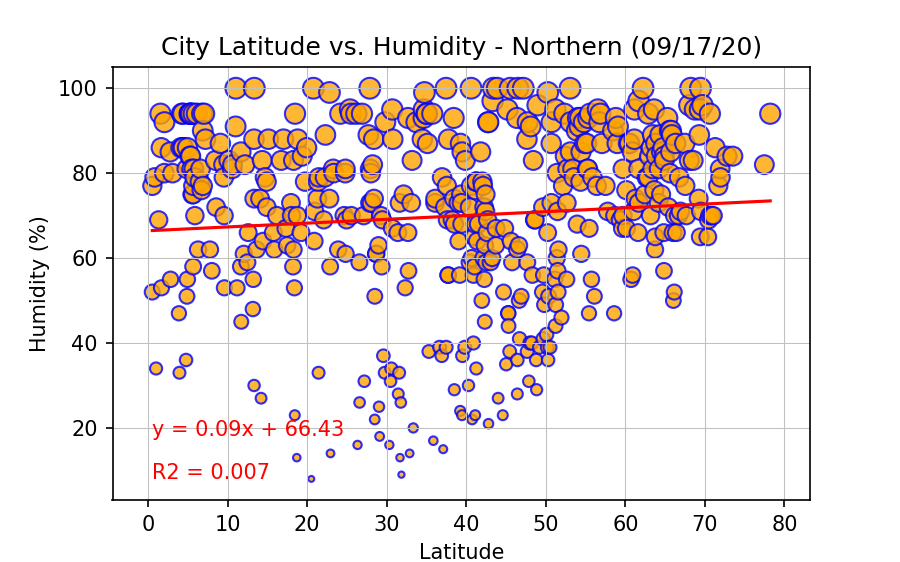

The line of best fit: y = 0.09x + 66.43
The r-squared is: 0.007390559081689833


In [23]:
# Print correlation coefficient (r) and p-value
print("The correlation coefficient (r) is " + 
      str(round((df_corr["Northern"]["Humidity (%)"][0]),2)))                                          
print("The p-value is " + str(df_corr["Northern"]["Humidity (%)"][1]))

# Set northen max temp as x-value coordinates
y_val = df_wx_n["Humidity (%)"]

# Set the size of the plot (width, height) 
plt.figure(figsize=(6,3.75))
plt.tight_layout()
plt.grid(color='#C0C0C0', linestyle='-', linewidth=0.5)

# Set title/labels
plt.title(f'City Latitude vs. Humidity - Northern ({date})')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')

# Create a scatter plot
plt.scatter(x_val_n, y_val, marker="o", 
            facecolors="orange", edgecolors="blue", s=np.array(y_val), alpha=0.8)

# Set x and y limits
plt.ylim(min(y_val)-5, max(y_val)+5)
plt.xlim(min(x_val_n)-5, max(x_val_n)+5)

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = st.linregress(x_val_n, y_val)

# Calculate the predictions for each value of x (# Rooms)
regression_values = x_val_n * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the regression line
plt.plot(x_val_n, regression_values, "red")

# Add the linear equation to the plot
plt.annotate(line_eq, (min(x_val_n),min(y_val)+10), fontsize=10, color="red")
plt.annotate(f"R2 = {round(rvalue**2,3)}", (min(x_val_n),min(y_val)), fontsize=10, color="red")

print(f"The line of best fit: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

# Save the chart
plt.savefig(os.path.join(f'images/{datef}',"N_lat_humidity_" + datef + ".png"))

# Show the chart
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient (r) is 0.01
The p-value is 0.9282995176403426


<IPython.core.display.Javascript object>


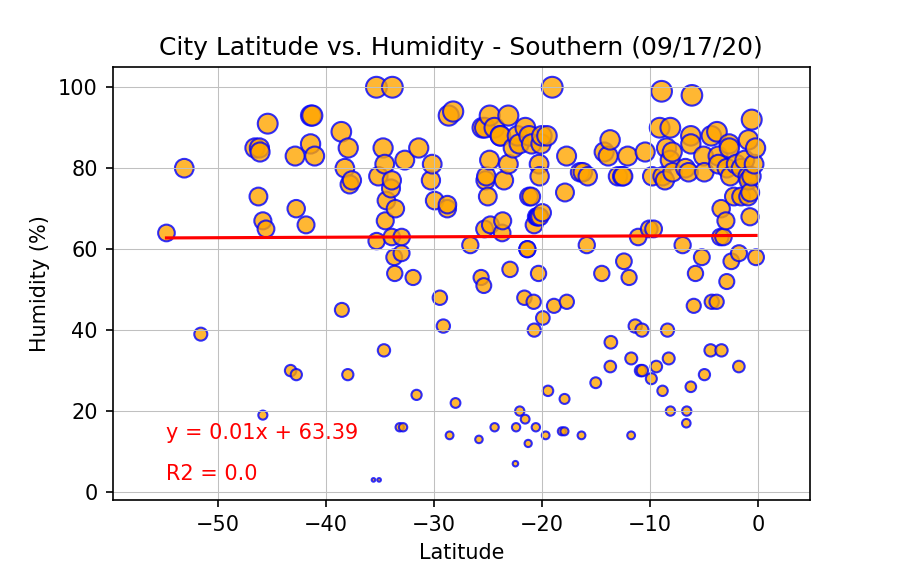

The line of best fit: y = 0.01x + 63.39
The r-squared is: 3.672128781242299e-05


In [24]:
# Print correlation coefficient (r) and p-value
print("The correlation coefficient (r) is " + 
      str(round((df_corr["Southern"]["Humidity (%)"][0]),2)))                                          
print("The p-value is " + str(df_corr["Southern"]["Humidity (%)"][1]))

# Set northen max temp as x-value coordinates
y_val = df_wx_s["Humidity (%)"]

# Set the size of the plot (width, height) 
plt.figure(figsize=(6,3.75))
plt.tight_layout()
plt.grid(color='#C0C0C0', linestyle='-', linewidth=0.5)

# Set title/labels
plt.title(f'City Latitude vs. Humidity - Southern ({date})')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')

# Create a scatter plot
plt.scatter(x_val_s, y_val, marker="o", 
            facecolors="orange", edgecolors="blue", s=np.array(y_val), alpha=0.8)

# Set x and y limits
plt.ylim(min(y_val)-5, max(y_val)+5)
plt.xlim(min(x_val_s)-5, max(x_val_s)+5)

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = st.linregress(x_val_s, y_val)

# Calculate the predictions for each value of x (# Rooms)
regression_values = x_val_s * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the regression line
plt.plot(x_val_s, regression_values, "red")

# Add the linear equation to the plot
plt.annotate(line_eq, (min(x_val_s),min(y_val)+10), fontsize=10, color="red")
plt.annotate(f"R2 = {round(rvalue**2,3)}", (min(x_val_s),min(y_val)), fontsize=10, color="red")

print(f"The line of best fit: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

# Save the chart
plt.savefig(os.path.join(f'images/{datef}',"S_lat_humidity_" + datef + ".png"))

# Show the chart
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient (r) is 0.12
The p-value is 0.0073583911943629525


<IPython.core.display.Javascript object>


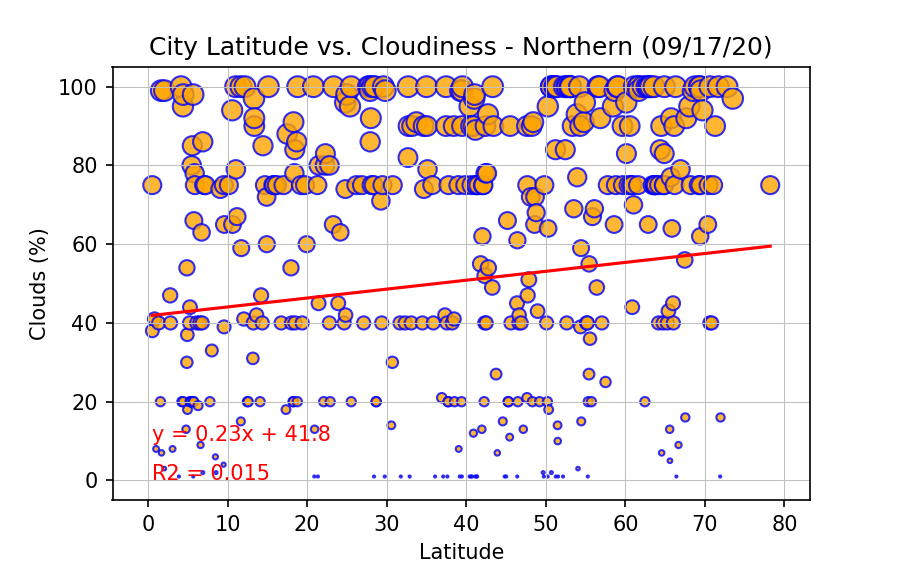

The line of best fit: y = 0.23x + 41.8
The r-squared is: 0.015183483676332077


In [25]:
# Print correlation coefficient (r) and p-value
print("The correlation coefficient (r) is " + 
      str(round((df_corr["Northern"]["Clouds (%)"][0]),2)))                                          
print("The p-value is " + str(df_corr["Northern"]["Clouds (%)"][1]))

# Set northen max temp as x-value coordinates
y_val = df_wx_n["Clouds (%)"]

# Set the size of the plot (width, height) 
plt.figure(figsize=(6,3.75))
plt.tight_layout()
plt.grid(color='#C0C0C0', linestyle='-', linewidth=0.5)

# Set title/labels
plt.title(f'City Latitude vs. Cloudiness - Northern ({date})')
plt.ylabel('Clouds (%)')
plt.xlabel('Latitude')

# Create a scatter plot
plt.scatter(x_val_n, y_val, marker="o", 
            facecolors="orange", edgecolors="blue", s=np.array(y_val), alpha=0.8)

# Set x and y limits
plt.ylim(min(y_val)-5, max(y_val)+5)
plt.xlim(min(x_val_n)-5, max(x_val_n)+5)

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = st.linregress(x_val_n, y_val)

# Calculate the predictions for each value of x (# Rooms)
regression_values = x_val_n * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the regression line
plt.plot(x_val_n, regression_values, "red")

# Add the linear equation to the plot
plt.annotate(line_eq, (min(x_val_n),min(y_val)+10), fontsize=10, color="red")
plt.annotate(f"R2 = {round(rvalue**2,3)}", (min(x_val_n),min(y_val)), fontsize=10, color="red")

print(f"The line of best fit: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

# Save the chart
plt.savefig(os.path.join(f'images/{datef}',"N_lat_clouds_" + datef + ".png"))

# Show the chart
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient (r) is 0.12
The p-value is 0.0752625646030114


<IPython.core.display.Javascript object>


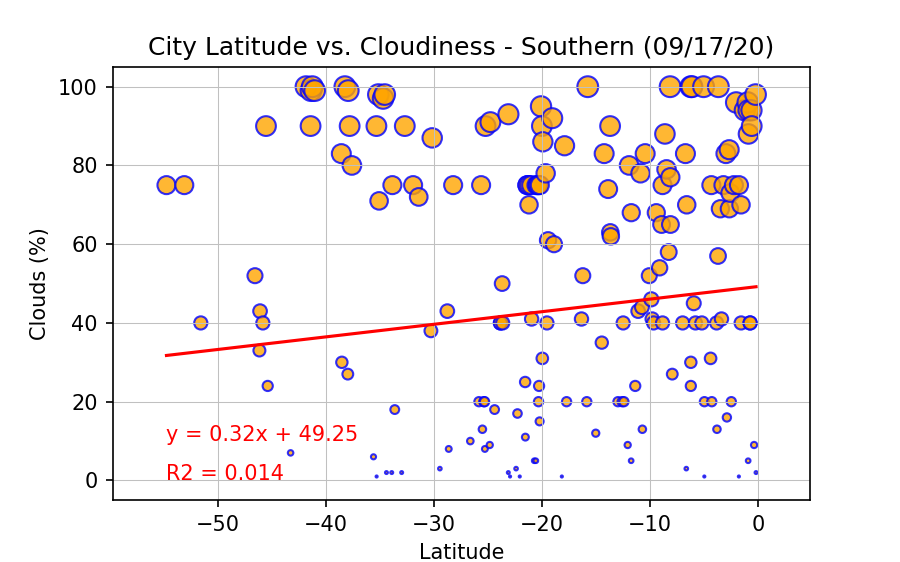

The line of best fit: y = 0.32x + 49.25
The r-squared is: 0.014248220177043167


In [26]:
# Print correlation coefficient (r) and p-value
print("The correlation coefficient (r) is " + 
      str(round((df_corr["Southern"]["Clouds (%)"][0]),2)))                                          
print("The p-value is " + str(df_corr["Southern"]["Clouds (%)"][1]))

# Set northen max temp as x-value coordinates
y_val = df_wx_s["Clouds (%)"]

# Set the size of the plot (width, height) 
plt.figure(figsize=(6,3.75))
plt.tight_layout()
plt.grid(color='#C0C0C0', linestyle='-', linewidth=0.5)

# Set title/labels
plt.title(f'City Latitude vs. Cloudiness - Southern ({date})')
plt.ylabel('Clouds (%)')
plt.xlabel('Latitude')

# Create a scatter plot
plt.scatter(x_val_s, y_val, marker="o", 
            facecolors="orange", edgecolors="blue", s=np.array(y_val), alpha=0.8)

# Set x and y limits
plt.ylim(min(y_val)-5, max(y_val)+5)
plt.xlim(min(x_val_s)-5, max(x_val_s)+5)

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = st.linregress(x_val_s, y_val)

# Calculate the predictions for each value of x (# Rooms)
regression_values = x_val_s * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the regression line
plt.plot(x_val_s, regression_values, "red")

# Add the linear equation to the plot
plt.annotate(line_eq, (min(x_val_s),min(y_val)+10), fontsize=10, color="red")
plt.annotate(f"R2 = {round(rvalue**2,3)}", (min(x_val_s),min(y_val)), fontsize=10, color="red")

print(f"The line of best fit: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

# Save the chart
plt.savefig(os.path.join(f'images/{datef}',"S_lat_clouds_" + datef + ".png"))

# Show the chart
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient (r) is 0.08
The p-value is 0.08472845673318571


<IPython.core.display.Javascript object>


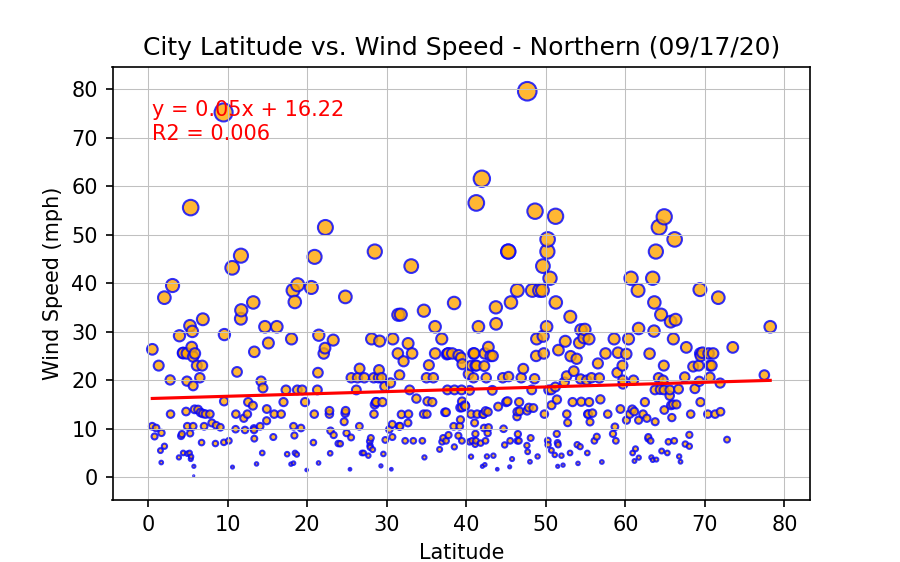

The line of best fit: y = 0.05x + 16.22
The r-squared is: 0.006309677549743005


In [27]:
# Print correlation coefficient (r) and p-value
print("The correlation coefficient (r) is " + 
      str(round((df_corr["Northern"]["Wind Speed (mph)"][0]),2)))                                          
print("The p-value is " + str(df_corr["Northern"]["Wind Speed (mph)"][1]))

# Set northen max temp as x-value coordinates
y_val = df_wx_n["Wind Speed (mph)"]

# Set the size of the plot (width, height) 
plt.figure(figsize=(6,3.75))
plt.tight_layout()
plt.grid(color='#C0C0C0', linestyle='-', linewidth=0.5)

# Set title/labels
plt.title(f'City Latitude vs. Wind Speed - Northern ({date})')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')

# Create a scatter plot
plt.scatter(x_val_n, y_val, marker="o", 
            facecolors="orange", edgecolors="blue", s=np.array(y_val), alpha=0.8)

# Set x and y limits
plt.ylim(min(y_val)-5, max(y_val)+5)
plt.xlim(min(x_val_n)-5, max(x_val_n)+5)

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = st.linregress(x_val_n, y_val)

# Calculate the predictions for each value of x (# Rooms)
regression_values = x_val_n * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the regression line
plt.plot(x_val_n, regression_values, "red")

# Add the linear equation to the plot
plt.annotate(line_eq, (min(x_val_n),max(y_val)-5), fontsize=10, color="red")
plt.annotate(f"R2 = {round(rvalue**2,3)}", (min(x_val_n),max(y_val)-10), fontsize=10, color="red")

print(f"The line of best fit: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

# Save the chart
plt.savefig(os.path.join(f'images/{datef}',"N_lat_wind_" + datef + ".png"))

# Show the chart
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient (r) is -0.31
The p-value is 2.3919817067817907e-06


<IPython.core.display.Javascript object>


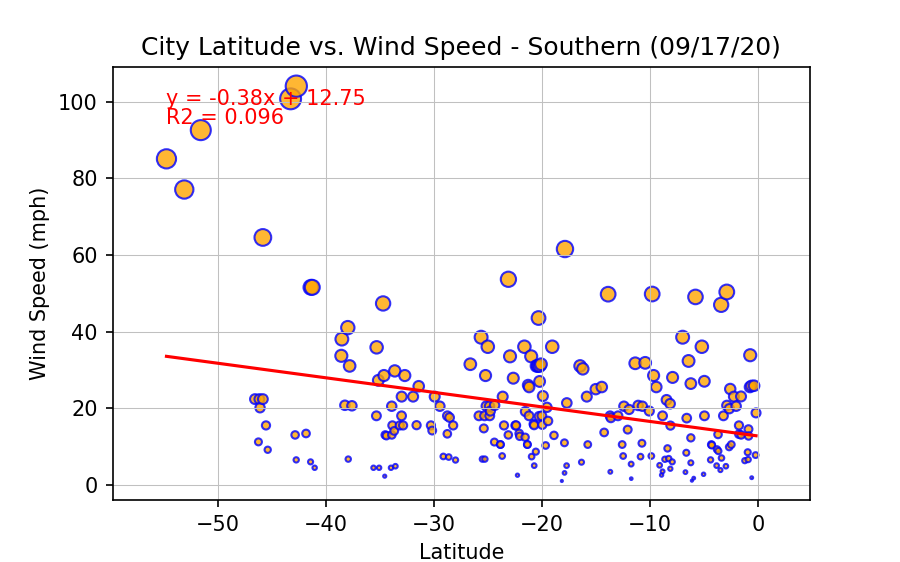

The line of best fit: y = -0.38x + 12.75
The r-squared is: 0.0959862344272101


In [28]:
# Print correlation coefficient (r) and p-value
print("The correlation coefficient (r) is " + 
      str(round((df_corr["Southern"]["Wind Speed (mph)"][0]),2)))                                          
print("The p-value is " + str(df_corr["Southern"]["Wind Speed (mph)"][1]))

# Set northen max temp as x-value coordinates
y_val = df_wx_s["Wind Speed (mph)"]

# Set the size of the plot (width, height) 
plt.figure(figsize=(6,3.75))
plt.tight_layout()
plt.grid(color='#C0C0C0', linestyle='-', linewidth=0.5)

# Set title/labels
plt.title(f'City Latitude vs. Wind Speed - Southern ({date})')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')

# Create a scatter plot
plt.scatter(x_val_s, y_val, marker="o", 
            facecolors="orange", edgecolors="blue", s=np.array(y_val), alpha=0.8)

# Set x and y limits
plt.ylim(min(y_val)-5, max(y_val)+5)
plt.xlim(min(x_val_s)-5, max(x_val_s)+5)

# Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = st.linregress(x_val_s, y_val)

# Calculate the predictions for each value of x (# Rooms)
regression_values = x_val_s * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the regression line
plt.plot(x_val_s, regression_values, "red")

# Add the linear equation to the plot
plt.annotate(line_eq, (min(x_val_s),max(y_val)-5), fontsize=10, color="red")
plt.annotate(f"R2 = {round(rvalue**2,3)}", (min(x_val_s),max(y_val)-10), fontsize=10, color="red")

print(f"The line of best fit: {line_eq}")
print(f"The r-squared is: {rvalue**2}")

# Save the chart
plt.savefig(os.path.join(f'images/{datef}',"S_lat_wind_" + datef + ".png"))

# Show the chart
plt.show()